In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=14)

In [3]:
df = pd.read_excel('SSO_Data.xlsx')
df.head()

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,...,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3
0,6582,567722.0,NaN,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
1,6583,567723.0,NaN,2019-03-10,6804,S FLORES ST,80,0.0,80.0,3/10/2019 2:25:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
2,6581,567714.0,NaN,2019-03-09,215,AUDREY ALENE DR,79,0.0,10.0,3/9/2019 6:00:00 PM,...,NaN,NaN,03/10/2019 09:36,03/10/2019 10:45,1.15,69.0,NaN,NaN,0.0,0.0
3,6584,567713.0,NaN,2019-03-09,3602,SE MILITARY DR,83,0.0,83.0,3/9/2019 3:37:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
4,6580,567432.0,NaN,2019-03-06,100,PANSY LN,75,0.0,75.0,3/6/2019 9:40:00 AM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0


In [4]:
df.shape

(3183, 57)

In [8]:
features = df.isna().sum()
type(features)

pandas.core.series.Series

In [27]:
bad_list = list(features[(features / df.shape[0]) > .4].index)
bad_list

['SERVNO',
 'EARZ_ZONE',
 'DWNDPTH',
 'UPSDPTH',
 'SewerAssetExp',
 'NUM_SPILLS_24MOS',
 'PREVSPILL_24MOS',
 'LASTCLND',
 'ResponseTime',
 'ResponseDTTM',
 'TIMEINT',
 'STEPS_TO_PREVENT',
 'SPILL_START_2',
 'SPILL_STOP_2',
 'HRS_2',
 'GAL_2',
 'SPILL_START_3',
 'SPILL_STOP_3',
 'HRS_3',
 'GAL_3']

In [29]:
df = df.drop(columns=bad_list)
df.isna().sum()

SSO_ID                  0
INSPKEY               797
REPORTDATE              0
SPILL_ADDRESS           0
SPILL_ST_NAME           0
TOTAL_GAL               0
GALSRET               475
GAL                     0
SPILL_START             0
SPILL_STOP              0
HRS                     3
CAUSE                   0
COMMENTS              533
ACTIONS                 8
WATERSHED               0
UNITID                  4
UNITID2               244
DISCHARGE_TO            4
DISCHARGE_ROUTE       827
COUNCIL_DISTRICT      322
FERGUSON               30
Month                   0
Year                    0
Week                    0
Expr1029                7
PIPEDIAM              190
PIPELEN               190
PIPETYPE              190
INSTYEAR              118
Inches_No             487
RainFall_Less3        542
SPILL ADDRESS          43
NUM_SPILLS_COMPKEY      0
UNITTYPE               17
ASSETTYPE               2
Public Notice           0
Root_Cause              7
dtype: int64

In [30]:
df.shape

(3183, 37)

In [31]:
df.head()

,SSO_ID,INSPKEY,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,...,PIPETYPE,INSTYEAR,Inches_No,RainFall_Less3,SPILL ADDRESS,NUM_SPILLS_COMPKEY,UNITTYPE,ASSETTYPE,Public Notice,Root_Cause
0,6582,567722.0,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,...,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,GRAVITY,Sewer Main,False,NaN
1,6583,567723.0,2019-03-10,6804,S FLORES ST,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,...,PVC,1988.0,NaN,NaN,6804 S FLORES,1,GRAVITY,Sewer Main,False,NaN
2,6581,567714.0,2019-03-09,215,AUDREY ALENE DR,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,...,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,GRAVITY,Sewer Main,False,NaN
3,6584,567713.0,2019-03-09,3602,SE MILITARY DR,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,...,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,GRAVITY,Sewer Main,False,NaN
4,6580,567432.0,2019-03-06,100,PANSY LN,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,...,CP,1952.0,NaN,NaN,100 PANSY LN,2,GRAVITY,Sewer Main,False,NaN


In [35]:
list(df.columns)

['SSO_ID',
 'INSPKEY',
 'REPORTDATE',
 'SPILL_ADDRESS',
 'SPILL_ST_NAME',
 'TOTAL_GAL',
 'GALSRET',
 'GAL',
 'SPILL_START',
 'SPILL_STOP',
 'HRS',
 'CAUSE',
 'COMMENTS',
 'ACTIONS',
 'WATERSHED',
 'UNITID',
 'UNITID2',
 'DISCHARGE_TO',
 'DISCHARGE_ROUTE',
 'COUNCIL_DISTRICT',
 'FERGUSON',
 'Month',
 'Year',
 'Week',
 'Expr1029',
 'PIPEDIAM',
 'PIPELEN',
 'PIPETYPE',
 'INSTYEAR',
 'Inches_No',
 'RainFall_Less3',
 'SPILL ADDRESS',
 'NUM_SPILLS_COMPKEY',
 'UNITTYPE',
 'ASSETTYPE',
 'Public Notice',
 'Root_Cause']

In [32]:
df.Root_Cause.value_counts()

STRUCTURAL           1237
GREASE                610
DEBRIS                443
RAIN EVENT            353
CONTRACTOR            164
LIFT STATION          125
OTHER                  61
VANDALISM              48
RAIN EVENT             48
VANDALISM              24
ROOTS                  22
LIFT STATION           15
I/I                    12
CONTRACTOR              8
BY PASS PUMP LEAK       3
Grease                  1
OTHER                   1
Debris                  1
Name: Root_Cause, dtype: int64

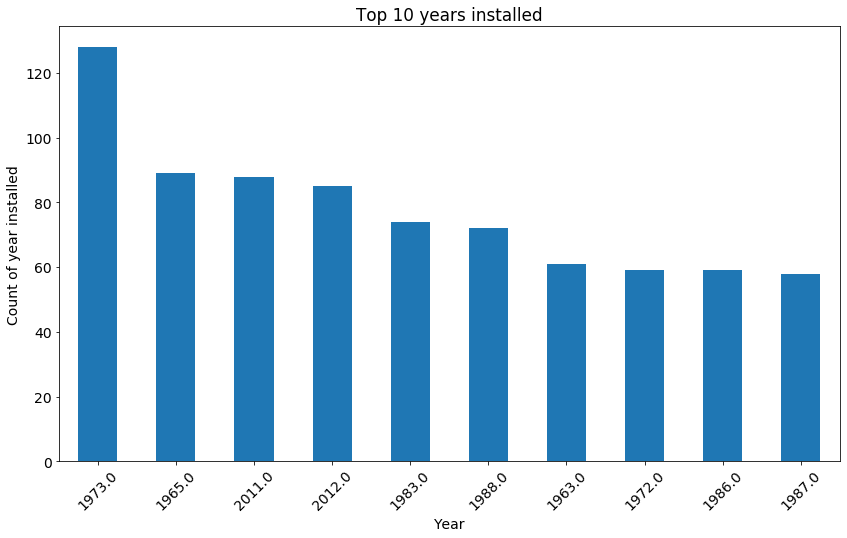

In [72]:
df.INSTYEAR.value_counts().head(10).plot.bar()
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.ylabel('Count of year installed')
plt.xlabel('Year')
plt.title('Top 10 years installed')
plt.show()

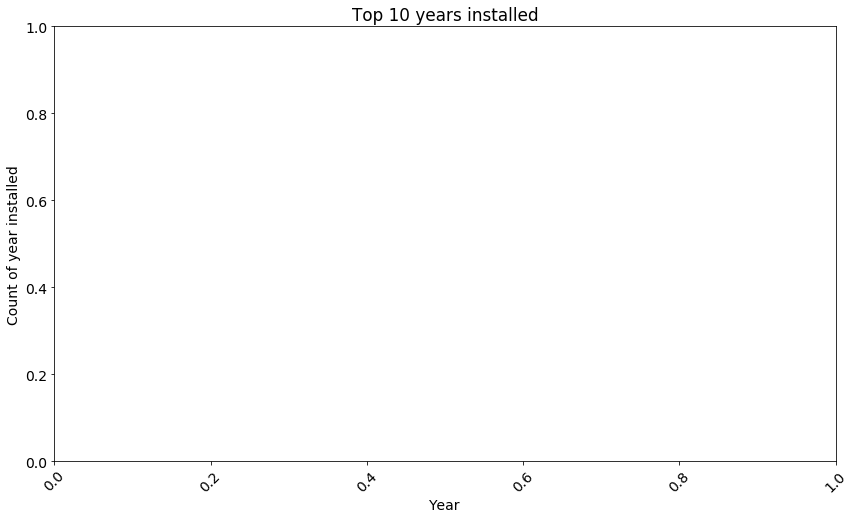